In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# dureaza mai mult de un minut direct din *.xlsx
#data_ini = pd.read_excel('Statistica_BAC_Mate_mate-info.xlsx', sheet_name='borderou', header=None, skiprows=10)

In [3]:
# din *.csv, warning privind unele nume (Col1) - necesar convert '1: str'
data_ini = pd.read_csv('Statistica_BAC_Mate_mate-info.csv', converters = {1: str}, header=None, 
                            names=['nume','cod','judet', 'centrul', 'scoala',
                            'item1.1.1', 'item1.1.2', 'item1.1B', 'item1.2.1', 'item1.2.2', 'item1.2B', 
                            'item1.3.1', 'item1.3.2', 'item1.3B', 'item1.4.1', 'item1.4.2', 'item1.4B', 
                            'item1.5.1', 'item1.5.2', 'item1.5B', 'item1.6.1', 'item1.6.2', 'item1.6B', 'subiect1B', 
                            'item2.1a.1', 'item2.1a.2', 'item2.1aB', 'item2.1b.1', 'item2.1b.2', 'item2.1bB', 
                            'item2.1c.1', 'item2.1c.2', 'item2.1cB', 'item2.2a.1', 'item2.2a.2', 'item2.2aB', 
                            'item2.2b.1', 'item2.2b.2', 'item2.2bB', 'item2.2c.1', 'item2.2c.2', 'item2.2cB', 'subiect2B', 
                            'item3.1a.1', 'item3.1a.2', 'item3.1aB', 'item3.1b.1', 'item3.1b.2', 'item3.1bB', 
                            'item3.1c.1', 'item3.1c.2', 'item3.1cB', 'item3.2a.1', 'item3.2a.2', 'item3.2aB', 
                            'item3.2b.1', 'item3.2b.2', 'item3.2bB', 'item3.2c.1', 'item3.2c.2', 'item3.2cB', 'subiect3B', 
                            'oficiu', 'notaB'])

In [4]:
#nota/10
data_ini['notaB'] = data_ini['notaB'].div(10)

In [5]:
#Drop 'oficiu'
#data_ini = data_ini.drop(columns=['oficiu'])

In [6]:
#medii
data_ini['item1.1'] = data_ini.groupby('cod')['item1.1B'].transform('mean')
data_ini['item1.2'] = data_ini.groupby('cod')['item1.2B'].transform('mean')
data_ini['item1.3'] = data_ini.groupby('cod')['item1.3B'].transform('mean')
data_ini['item1.4'] = data_ini.groupby('cod')['item1.4B'].transform('mean')
data_ini['item1.5'] = data_ini.groupby('cod')['item1.5B'].transform('mean')
data_ini['item1.6'] = data_ini.groupby('cod')['item1.6B'].transform('mean')

data_ini['subiect1'] = data_ini.groupby('cod')['subiect1B'].transform('mean')

data_ini['item2.1a'] = data_ini.groupby('cod')['item2.1aB'].transform('mean')
data_ini['item2.1b'] = data_ini.groupby('cod')['item2.1bB'].transform('mean')
data_ini['item2.1c'] = data_ini.groupby('cod')['item2.1cB'].transform('mean')
data_ini['item2.2a'] = data_ini.groupby('cod')['item2.2aB'].transform('mean')
data_ini['item2.2b'] = data_ini.groupby('cod')['item2.2bB'].transform('mean')
data_ini['item2.2c'] = data_ini.groupby('cod')['item2.2cB'].transform('mean')

data_ini['subiect2'] = data_ini.groupby('cod')['subiect2B'].transform('mean')

data_ini['item3.1a'] = data_ini.groupby('cod')['item3.1aB'].transform('mean')
data_ini['item3.1b'] = data_ini.groupby('cod')['item3.1bB'].transform('mean')
data_ini['item3.1c'] = data_ini.groupby('cod')['item3.1cB'].transform('mean')
data_ini['item3.2a'] = data_ini.groupby('cod')['item3.2aB'].transform('mean')
data_ini['item3.2b'] = data_ini.groupby('cod')['item3.2bB'].transform('mean')
data_ini['item3.2c'] = data_ini.groupby('cod')['item3.2cB'].transform('mean')

data_ini['subiect3'] = data_ini.groupby('cod')['subiect3B'].transform('mean')

data_ini['nota'] = data_ini.groupby('cod')['notaB'].transform('mean')

In [7]:
#dupa ce am adaugat coloanele cu punctaje medii pot elimina randurile duplicate si coloanele care nu contin medii
data_unq = data_ini.drop_duplicates('cod')

data_unq = data_unq.drop(columns=['nume','centrul', 'scoala', 'item1.1.1', 'item1.1.2', 'item1.1B', 'item1.2.1', 'item1.2.2', 'item1.2B', 
                                  'item1.3.1', 'item1.3.2', 'item1.3B', 'item1.4.1', 'item1.4.2', 'item1.4B', 
                                  'item1.5.1', 'item1.5.2', 'item1.5B', 'item1.6.1', 'item1.6.2', 'item1.6B', 'subiect1B', 
                                  'item2.1a.1', 'item2.1a.2', 'item2.1aB', 'item2.1b.1', 'item2.1b.2', 'item2.1bB', 
                                  'item2.1c.1', 'item2.1c.2', 'item2.1cB', 'item2.2a.1', 'item2.2a.2', 'item2.2aB', 
                                  'item2.2b.1', 'item2.2b.2', 'item2.2bB', 'item2.2c.1', 'item2.2c.2', 'item2.2cB', 'subiect2B', 
                                  'item3.1a.1', 'item3.1a.2', 'item3.1aB', 'item3.1b.1', 'item3.1b.2', 'item3.1bB', 
                                  'item3.1c.1', 'item3.1c.2', 'item3.1cB', 'item3.2a.1', 'item3.2a.2', 'item3.2aB', 
                                  'item3.2b.1', 'item3.2b.2', 'item3.2bB', 'item3.2c.1', 'item3.2c.2', 'item3.2cB', 'subiect3B', 
                                  'oficiu', 'notaB'])

In [8]:
#selectez numai unele coloane
data = data_unq[['judet', 
                'item1.1', 'item1.2', 'item1.3', 'item1.4', 'item1.5', 'item1.6','subiect1',
                'item2.1a', 'item2.1b', 'item2.1c', 'item2.2a', 'item2.2b', 'item2.2c', 'subiect2',
                'item3.1a', 'item3.1b', 'item3.1c', 'item3.2a', 'item3.2b', 'item3.2c', 'subiect3',
                'nota']]

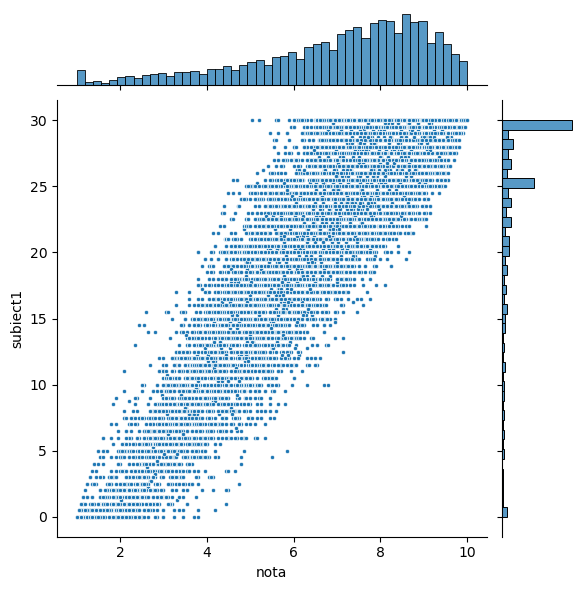

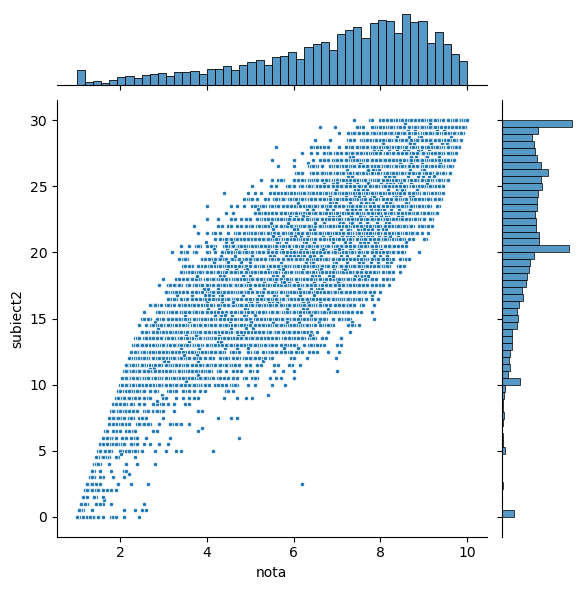

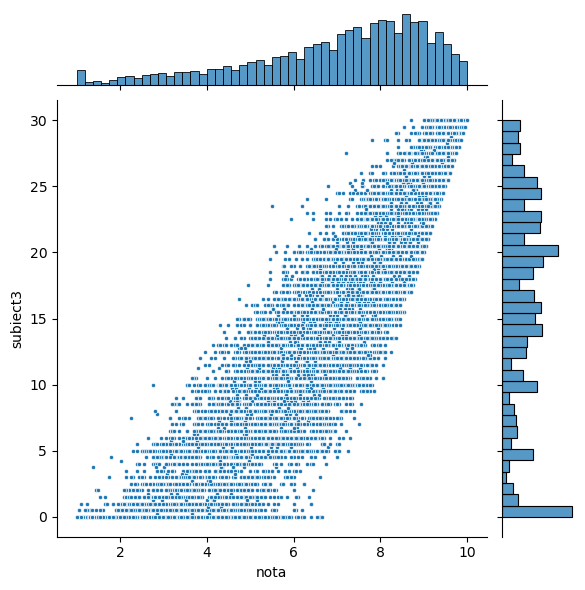

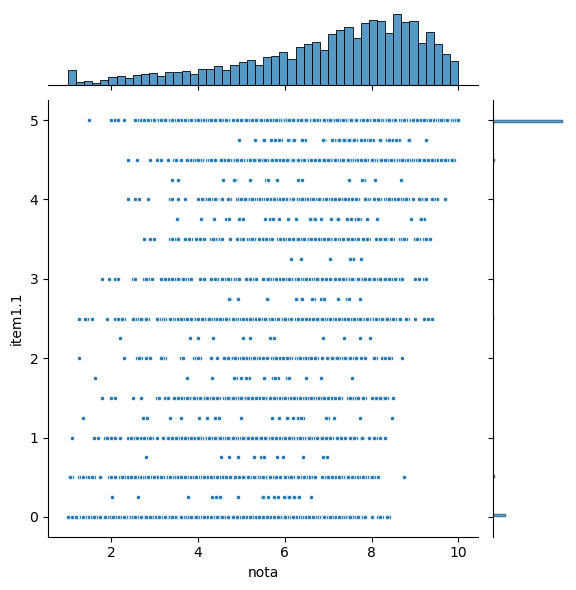

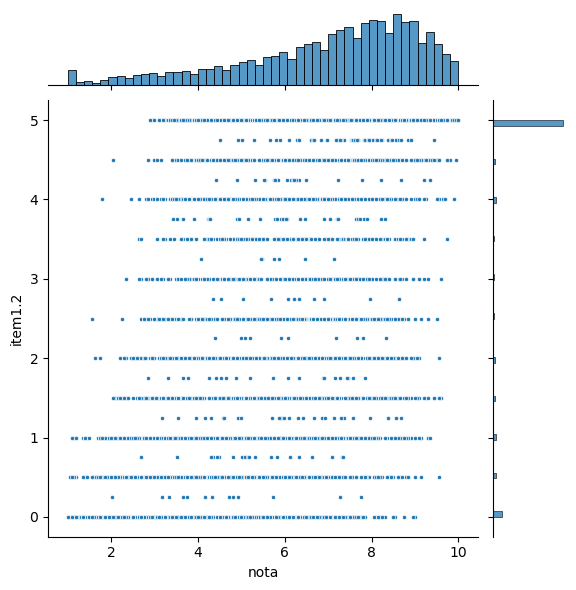

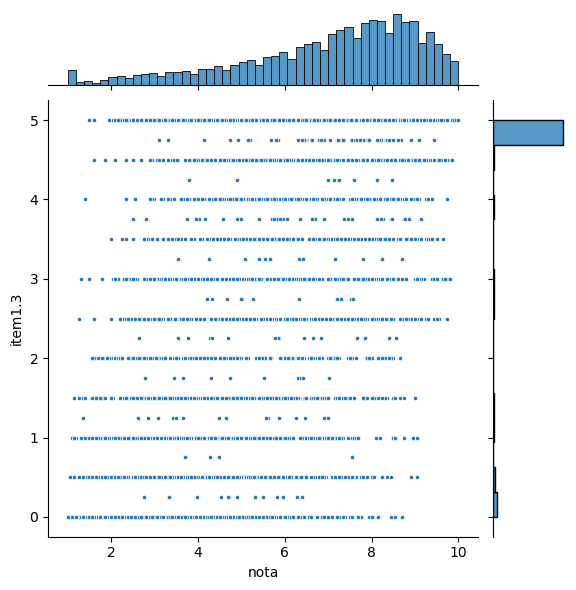

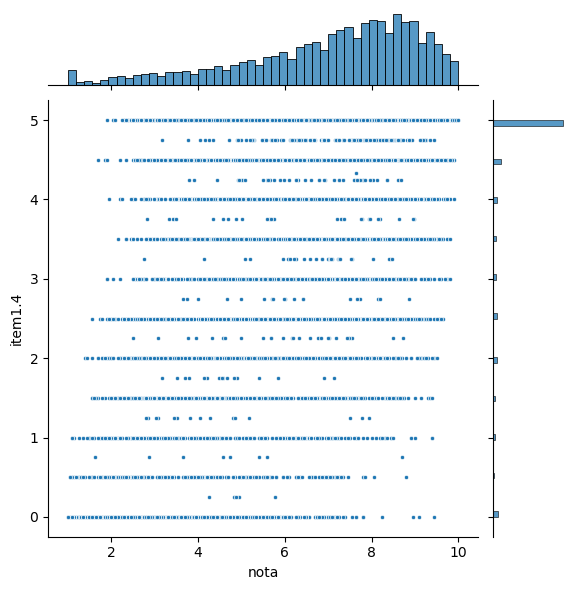

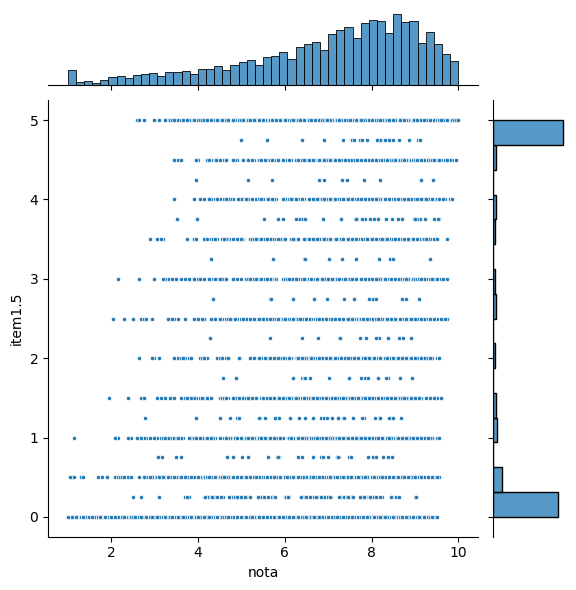

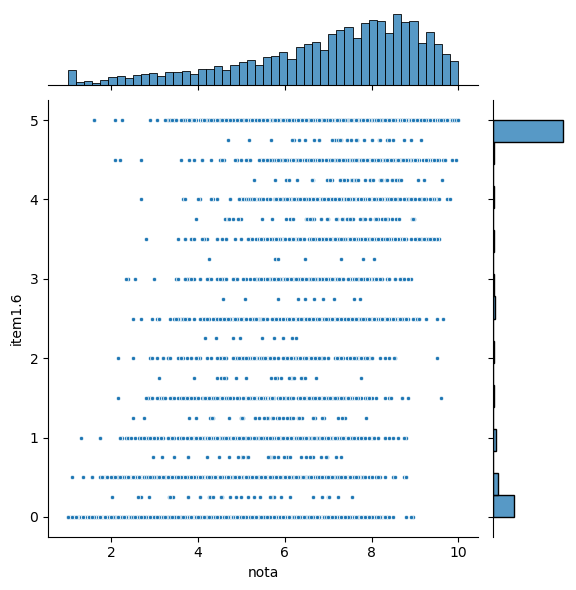

In [9]:
sns.jointplot(x='nota', y='subiect1', data=data, marker='.')
sns.jointplot(x='nota', y='subiect2', data=data, marker='.')
sns.jointplot(x='nota', y='subiect3', data=data, marker='.')
sns.jointplot(x='nota', y='item1.1', data=data, marker='.')
sns.jointplot(x='nota', y='item1.2', data=data, marker='.')
sns.jointplot(x='nota', y='item1.3', data=data, marker='.')
sns.jointplot(x='nota', y='item1.4', data=data, marker='.')
sns.jointplot(x='nota', y='item1.5', data=data, marker='.')
sns.jointplot(x='nota', y='item1.6', data=data, marker='.')


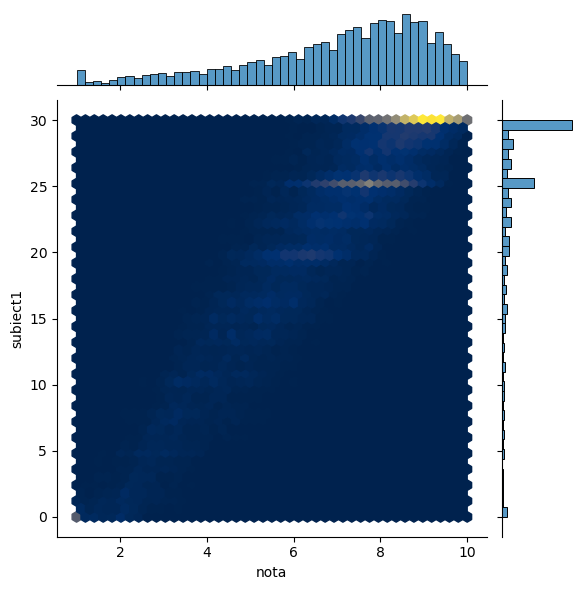

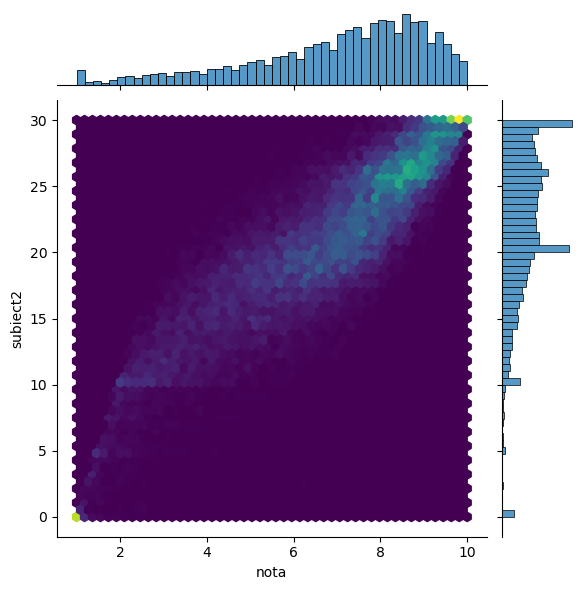

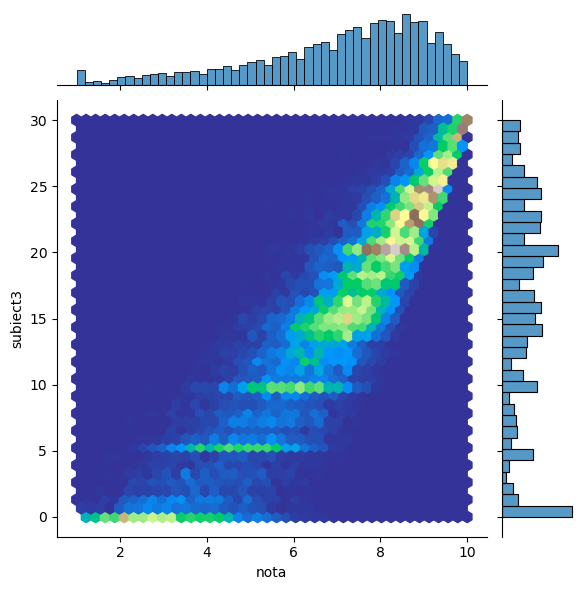

In [10]:
sns.jointplot(x='nota', y='subiect1', data=data, kind='hex', cmap='cividis')
sns.jointplot(x='nota', y='subiect2', data=data, kind='hex', cmap='viridis')
sns.jointplot(x='nota', y='subiect3', data=data, kind='hex', cmap='terrain')

In [11]:
#fig, ax = plt.subplots()
## the size of A4 paper
#fig.set_size_inches(11.7, 8.27)
#graph = sns.boxenplot(data, x="judet", y="nota")
#graph.tick_params(axis='x', rotation=90)

In [12]:
#numai note mai mari sau egale cu 9.0
#rslt_df = data_ini[data_ini['nota'] >= 9.0]

In [13]:
#pentru toti cu un anumit punctaj la un item, media notelor finale
data['notaAVG1.1'] = data.groupby('item1.1')['nota'].transform('mean')
data['notaAVG1.2'] = data.groupby('item1.2')['nota'].transform('mean')
data['notaAVG1.3'] = data.groupby('item1.3')['nota'].transform('mean')
data['notaAVG1.4'] = data.groupby('item1.4')['nota'].transform('mean')
data['notaAVG1.5'] = data.groupby('item1.5')['nota'].transform('mean')
data['notaAVG1.6'] = data.groupby('item1.6')['nota'].transform('mean')

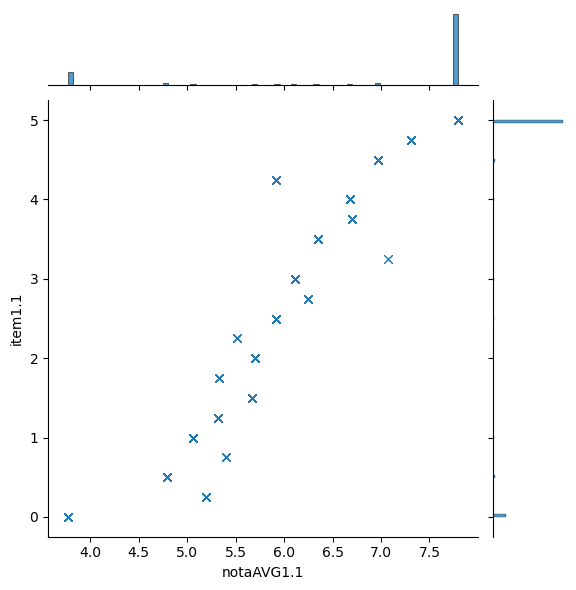

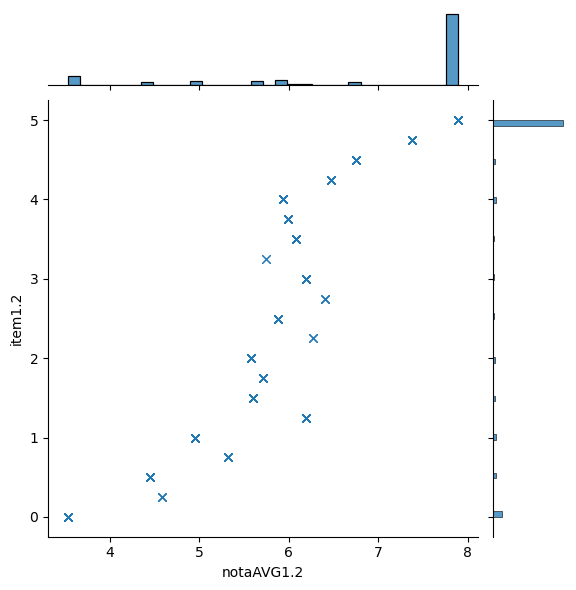

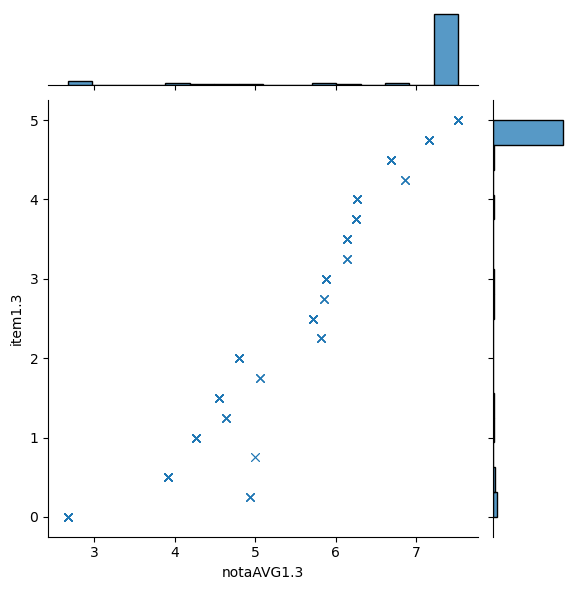

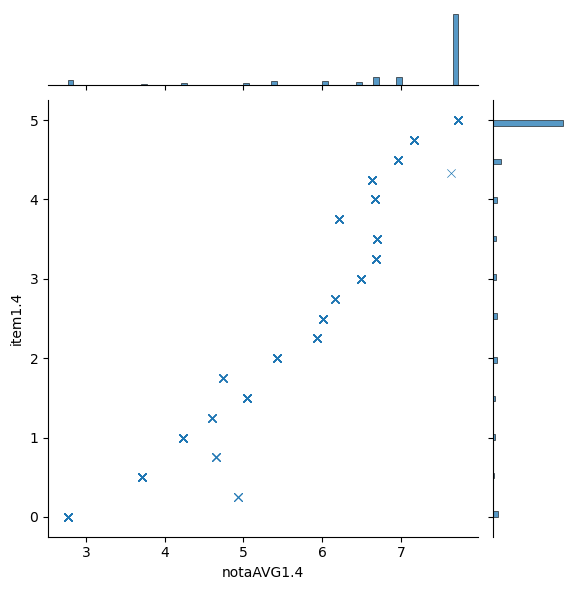

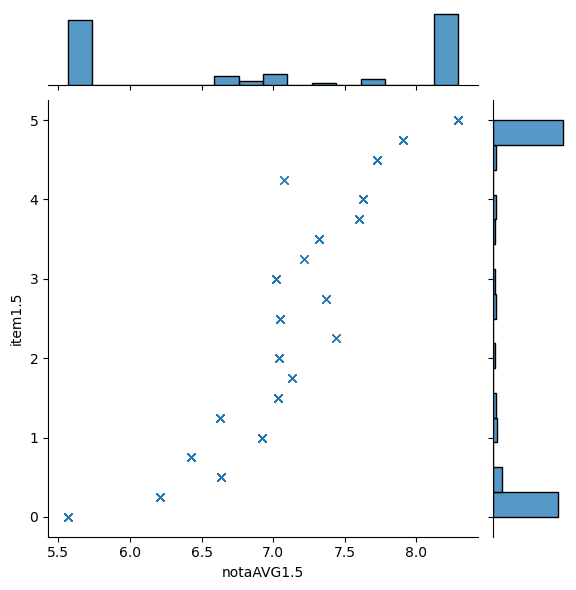

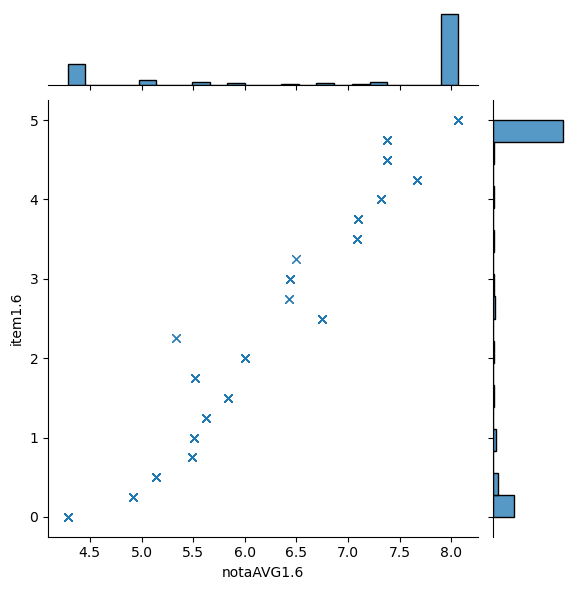

In [14]:
sns.jointplot(x='notaAVG1.1', y='item1.1', data=data, marker='x')
sns.jointplot(x='notaAVG1.2', y='item1.2', data=data, marker='x')
sns.jointplot(x='notaAVG1.3', y='item1.3', data=data, marker='x')
sns.jointplot(x='notaAVG1.4', y='item1.4', data=data, marker='x')
sns.jointplot(x='notaAVG1.5', y='item1.5', data=data, marker='x')
sns.jointplot(x='notaAVG1.6', y='item1.6', data=data, marker='x')